Parte 1. Encuentre un dominio V ⊂ C que incluye todo el conjunto de Mandel- brot. Justifique por qué este dominio contiene todo el fractal:

- Primero, definimos el conjunto V perteneciente al conjunto de los complejos, con límites en su dominio y rango, para evitar un conjunto infinito.

- Para justificar que este dominio V en C incluye a todo el conjunto de Mandelbrot podemos hacerlo de forma simple con la norma, porque sabemos que el conjunto de Mandelbrot contiene a los complejos que están acotados en la sucesión dada por la fórmula de Mandelbrot, así que si en algún paso del algoritmo, durante la iteración, un número c no converge (es decir, el valor absoluto de c es mayor a 2), la sucesión diverge hacia el infinito, y el número en cuestión no pertenece al conjunto de Mandelbrot. Así que, sabiendo que los números complejos en el conjunto de Mandelbrot deben estar dentro del disco de norma menor a 2, podemos estar seguros que nuestro conjunto V con dominio x=[-2, 1], y=[-1.5, 1.5] contiene a todos esos puntos convergentes, ya que el área de V es mayor al área del disco o área circular de radio 2, que está contenida en V.

- Posteriormente, en la variable **num_random_points**, definimos un número máximo de puntos pertenecientes al conjunto V definido anteriormente. Estos puntos se generarán de manera aleatoria mediante la función **np.random.uniform**, y se guardarán en la variable **c**.

In [154]:
import numpy as np

# Definimos el conjunto V perteneciente al conjunto de Mandelbrot, porque si no tomamos un conjunto más pequeño,
# el plano de Argand-Gauss se extendiende infinitamente.
x_min, x_max = -2.0, 1.0
y_min, y_max = -1.5, 1.5

num_random_points = int(1e6) # Número de puntos aleatorios generados en V (mayor número, mejor estimación del área).
max_iter = 500 # Max número de iteraciones para decidir si un número complejo escapa del conjunto de Mandelbrot.

# Según la fórmula del enunciado, generamos puntos complejos aleatorios, todos agrupados en la variable c.
real = np.random.uniform(x_min, x_max, num_random_points)
imag = np.random.uniform(y_min, y_max, num_random_points)
c = real + 1j * imag

print(f'Cantidad de puntos complejos (c) generados: {len(c)}')

Cantidad de puntos complejos (c) generados: 1000000


Parte 2. Programe el método de pixel counting:

(Aquí, no se ha escrito el algoritmo exactamente como en el resumen del enunciado, pero se ha iterado de forma análoga)

- Ahora, creamos un array **escape_times** de tamaño igual al número máximo de puntos aleatorios, donde cada valor del array será igual al máximo de iteraciones. En caso que el punto en cuestión diverja, su valor en el array será posteriormente actualizado **con la iteración en la que el número diverge**. Es decir, si el número no diverge antes de la **max_iter**, entonces no cambiará su valor en el array, pero si el número diverge, se actualizará su valor en el array con la iteración correspondiente en la que diverge.

- Lo anterior nos ayudará a clasificar los puntos según qué tan pronto divergen en función de sus iteraciones en el algoritmo, para así poder asignarle colores correspondientemente.

- Finalmente, se crea un array en la variable **array_is_convergent** de tamaño **num_random_points** llena de valores booleanos True, que se actualizará en la celda posterior, según el punto correspondiente al índice del array diverge o no.

In [155]:
z = np.zeros_like(c) # Esto crea un array con ceros, pero con la misma estructura y cantidad de elementos que c.

# Estas dos variables fueron explicadas en la celda anterior:
escape_times = np.full(num_random_points, max_iter)
is_convergent = np.ones(num_random_points, dtype=bool)

In [156]:
# Iteramos, aplicando la fórmula de Mandelbrot, para determinar qué puntos convergen o no en el radio 2 del plano de Argand-Gauss.

area_V = (x_max - x_min) * (y_max - y_min)
area_estimates = []

for k in range(1, max_iter + 1):
    '''
    Aquí, en la primera línea, el término c[is_convergent] selecciona sólo los elementos de c donde is_convergent es True, por ejemplo:
    c = np.array([10, 20, 30, 40, 50])
    is_convergent = np.array([True, False, True, False, True])
    c[is_convergent]  # Resultado: array([10, 30, 50])
    Funciona como una máscara para filtrar.

    Esta forma de iterar no es intuitiva en relación al enunciado de la tarea, porque comúnmente se entiende que la fórmula de
    Mendelbrot se aplica a cada punto complejo en particular, iterando una cantidad de veces hasta que converja o no, pero aquí
    se hace ese cálculo en paralelo con todos los puntos de c al mismo tiempo, por lo que es más eficiente y rápido.
    '''
    z[is_convergent] = z[is_convergent]**2 + c[is_convergent]
    escaped_now = np.abs(z[is_convergent]) >= 2
    escape_indices = np.where(is_convergent)[0][escaped_now]
    escape_times[escape_indices] = k
    is_convergent[escape_indices] = False

    # Cálculo del área en esta iteración
    area_k = np.sum(is_convergent) * area_V / num_random_points
    area_estimates.append(area_k)

Parte 3. Visualize con Matplotlib la convergencia de las aproximaciones Âk,m (D).

Es decir, una figura con k en el eje horizontal y Âk,m (D) en el eje ver-
tical, para un valor alto de m.

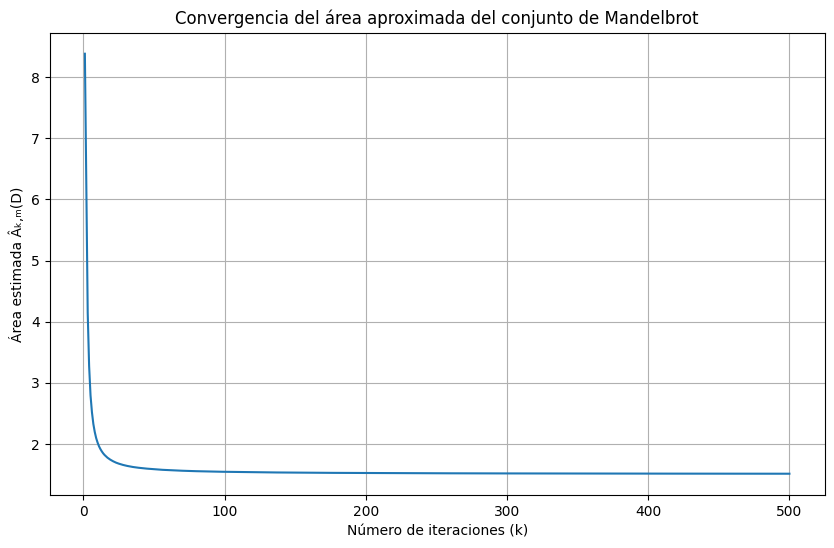

In [157]:
# Clasificamos los puntos imaginarios en 6 colores, según qué tan "pronto" divergen,
# el color negro se reserva para los números que pertenecen al conjunto de Mandelbrot
colors = np.zeros(num_random_points, dtype=int)
colors[(escape_times >= 1) & (escape_times <= 40)] = 1
colors[(escape_times >= 41) & (escape_times <= 80)] = 2
colors[(escape_times >= 81) & (escape_times <= 120)] = 3
colors[(escape_times >= 121) & (escape_times <= 160)] = 4
colors[(escape_times >= 161) & (escape_times < max_iter)] = 5
colors[escape_times == max_iter] = 0  # Los puntos complejos que no escaparon toman el color negro.

# Definimos la paleta de colores a utilizar en la visualización, donde cada color corresponde
# a qué tan pronto, según el número de iteraciones, diverge un número del conjunto de Mandelbrot.
custom_colors = ['black', 'blue', 'cyan', 'green', 'lime', 'yellow']
cmap = ListedColormap(custom_colors)

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import ListedColormap

# Visualización
plt.figure(figsize=(10,6))
plt.plot(range(1, max_iter + 1), area_estimates)
plt.xlabel('Número de iteraciones (k)')
plt.ylabel('Área estimada Âₖ,ₘ(D)')
plt.title('Convergencia del área aproximada del conjunto de Mandelbrot')
plt.grid(True)
plt.show()

Parte 4. No se conoce el valor exacto del área, pero las estimaciones comúnes
dicen 1,506. Calcule la diferencia con tu estimación y justifique si tu
algoritmo es correcto.

In [158]:
# Área total del dominio V definido al inicio (es un rectángulo).
area_total = (x_max - x_min) * (y_max - y_min)

# Calculamos cuántos puntos no escaparon (es decir, que están en el conjunto de Mandelbrot)
# Estos puntos son los que llegaron al límite máximo de iteraciones sin divergir:
num_points_in_set = np.sum(escape_times == max_iter)

# Estimamos el área del conjunto de Mandelbrot
area_mandelbrot = (num_points_in_set / num_random_points) * area_total

print(f"Área estimada del conjunto de Mandelbrot: {area_mandelbrot}")
print(f"Diferencia entre mi estimación y la del enunciado (1.506): {abs(area_mandelbrot - 1.506)}")

Área estimada del conjunto de Mandelbrot: 1.5138989999999999
Diferencia entre mi estimación y la del enunciado (1.506): 0.007898999999999878


Como vemos en el output anterior, la diferencia entre mi estimación por la iteración mediante el método de **pixel counting** similar al método de Monte Carlo, es muy pequeña, lo que indica que el algoritmo está haciendo una buena aproximación, pero hay que tener en cuenta que cada vez que se corre el código de nuevo, los resultados cambian, para tener una menor varianza en la estimación habría que aumentar tanto el número de iteraciones, como el número aleatorio de puntos, pero eso afectaría muchísimo el costo computacional. En resumen, mientras mejor sea la estimación de nuestro algoritmo, más tardará en ejecutarse.

5. Visualize el conjunto de Mandelbrot en el plano complejo: dibujen los
puntos cj tal que |xk,j | < 2. Utilize funciones de Matplotlib, p.ej.,
scatter o imshow. Hazlo para k = 1, 2, 5, 10, 100 y K.

Aquí, en la siguiente celda, no me quedó claro si k=K, según el enunciado, se refiere a la iteración máxima o no, porque el la tarea dice que si bien el área del conjunto de Mandelbrot es con m,K tendiendo a infinito, ***"en la práctica uno logra obtener una aproximación razonable para valores de m y K altos pero fijos"***, así que tomé el valor de K más alto posible, que es el máximo de iteraciones que el algoritmo tiene para cada número complejo (este cálculo, como se mencionó antes, de hace en paralelo).

Entonces, tomamos **K=max_iter=500**, pero en caso de querer un K variable, basta con reemplazarlo en el código por cualquier otro valor, o declarar una variable esperando un input del usuario, para indicar el valor de K a voluntad.

Cantidad de puntos complejos (c) generados: 1000000


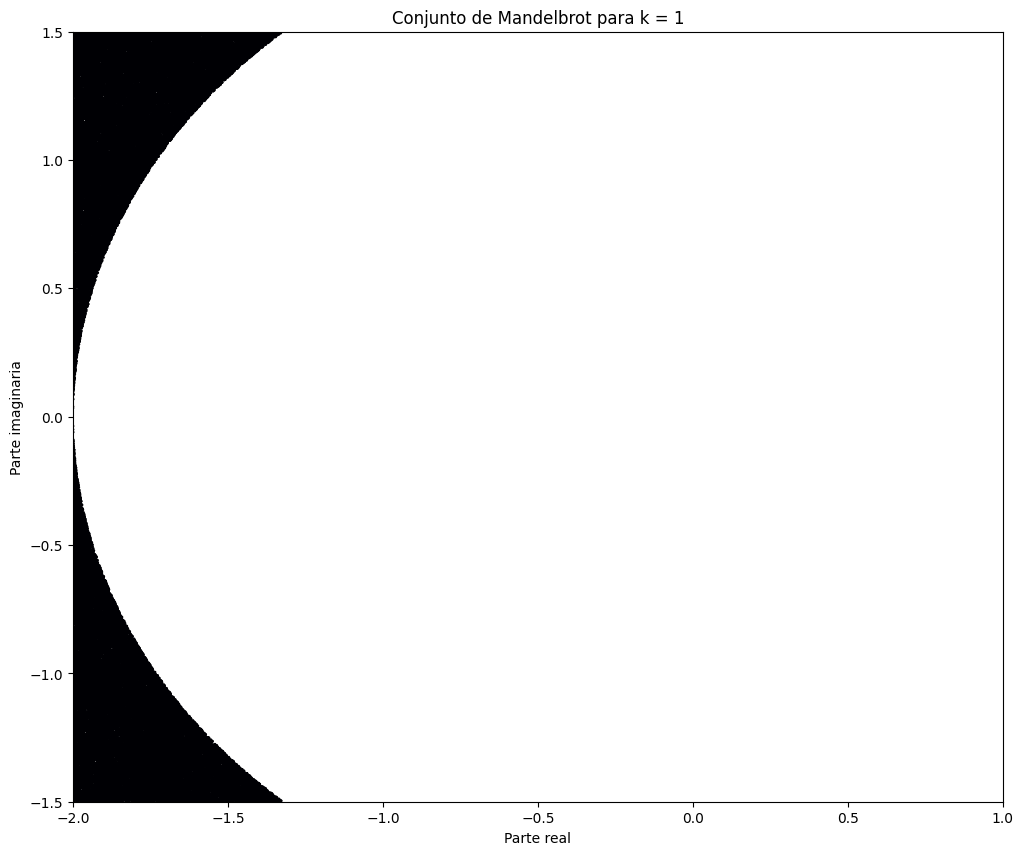

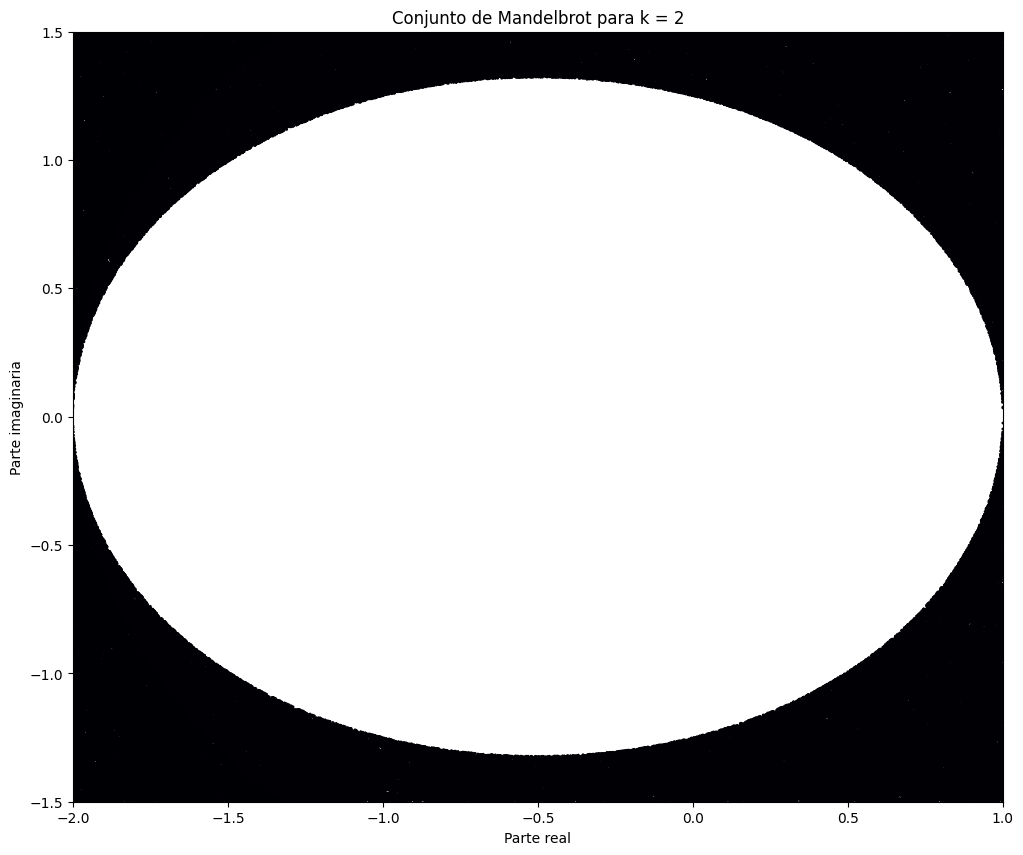

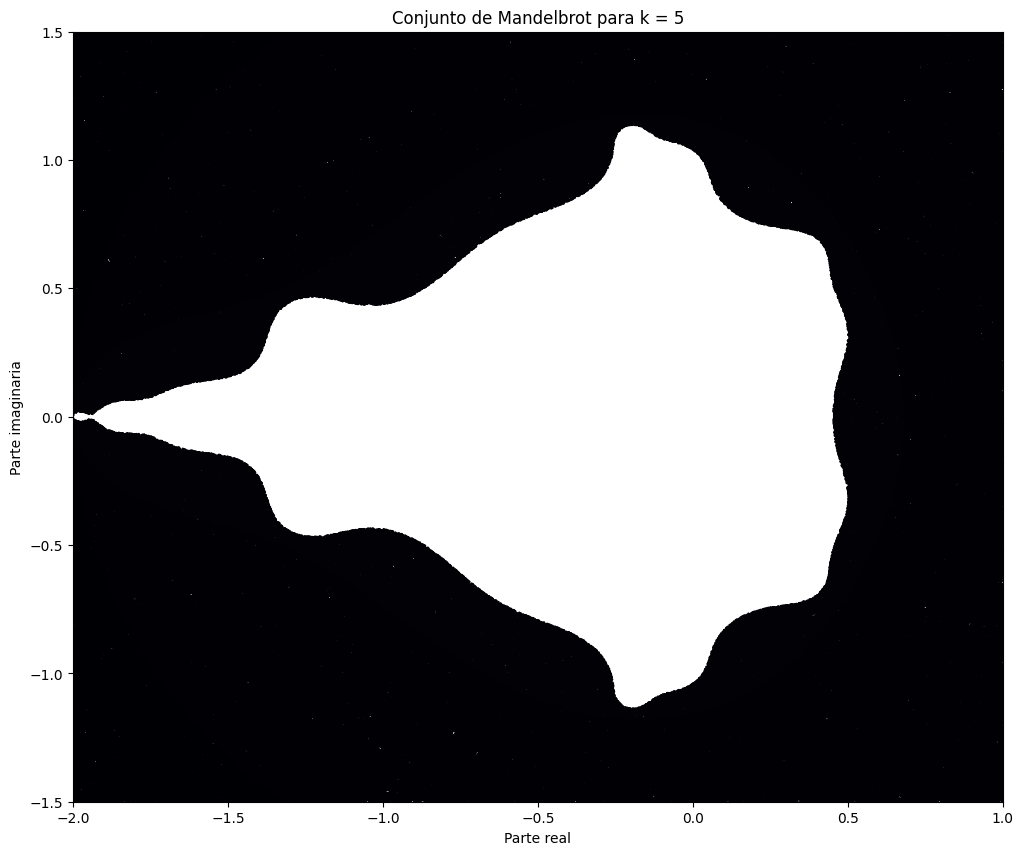

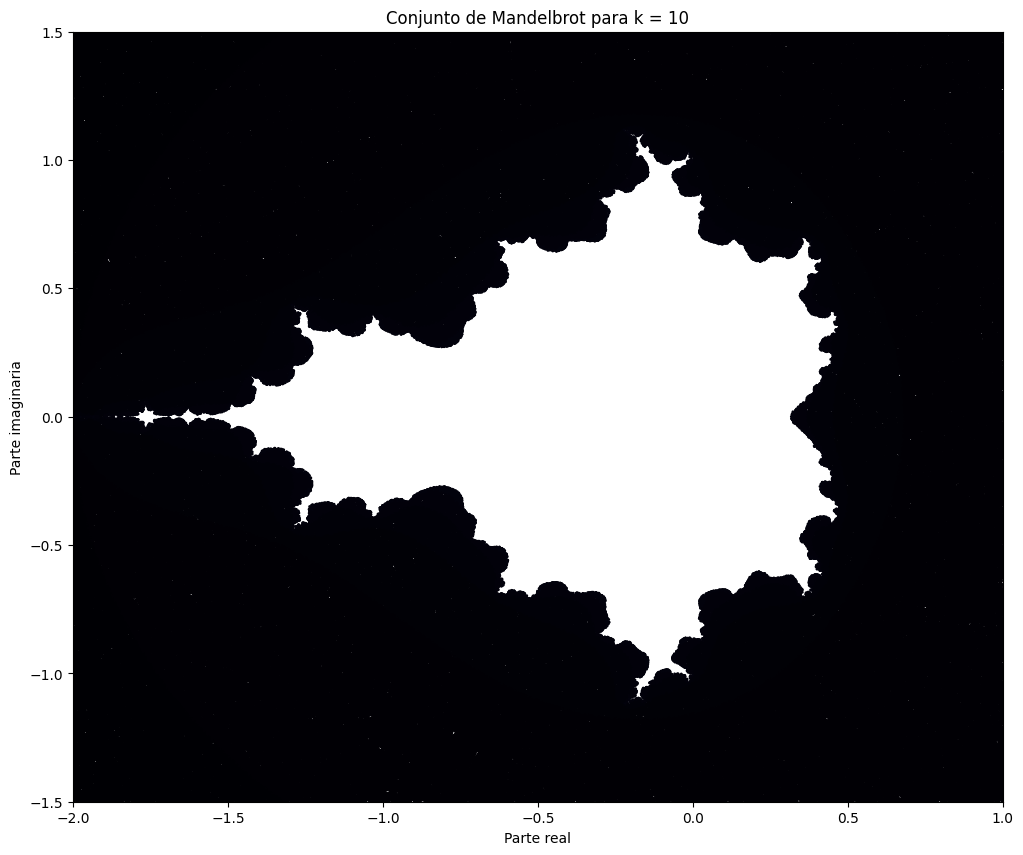

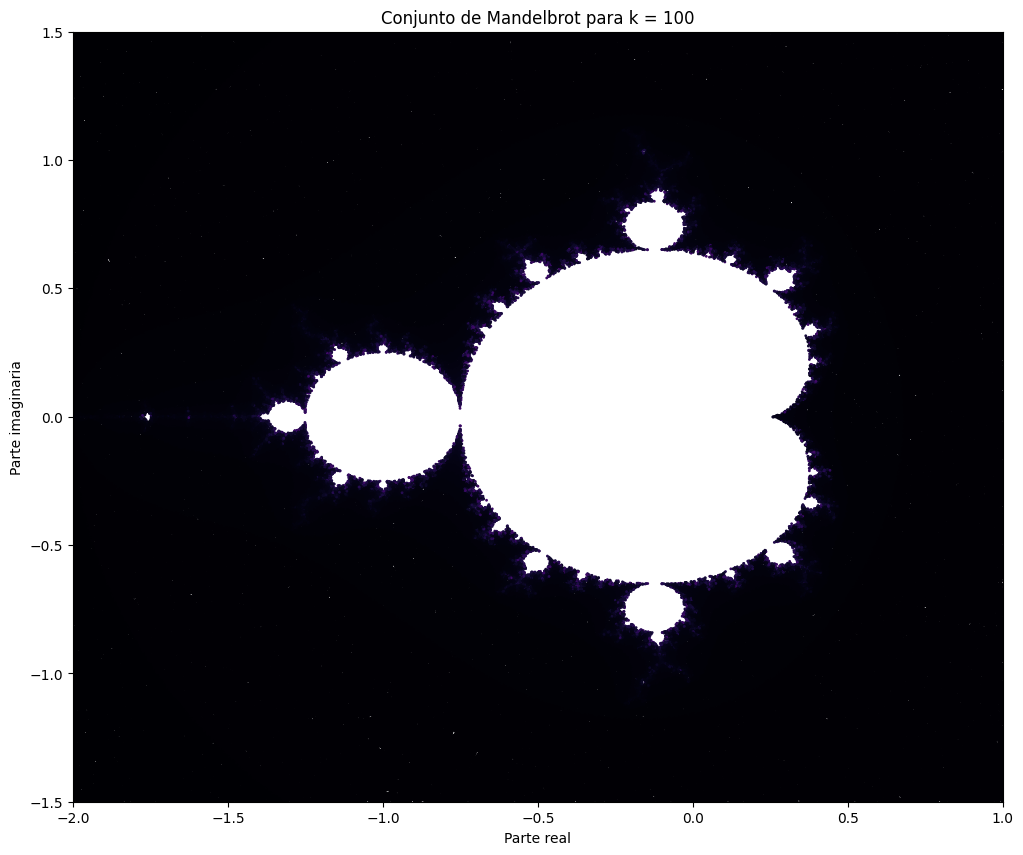

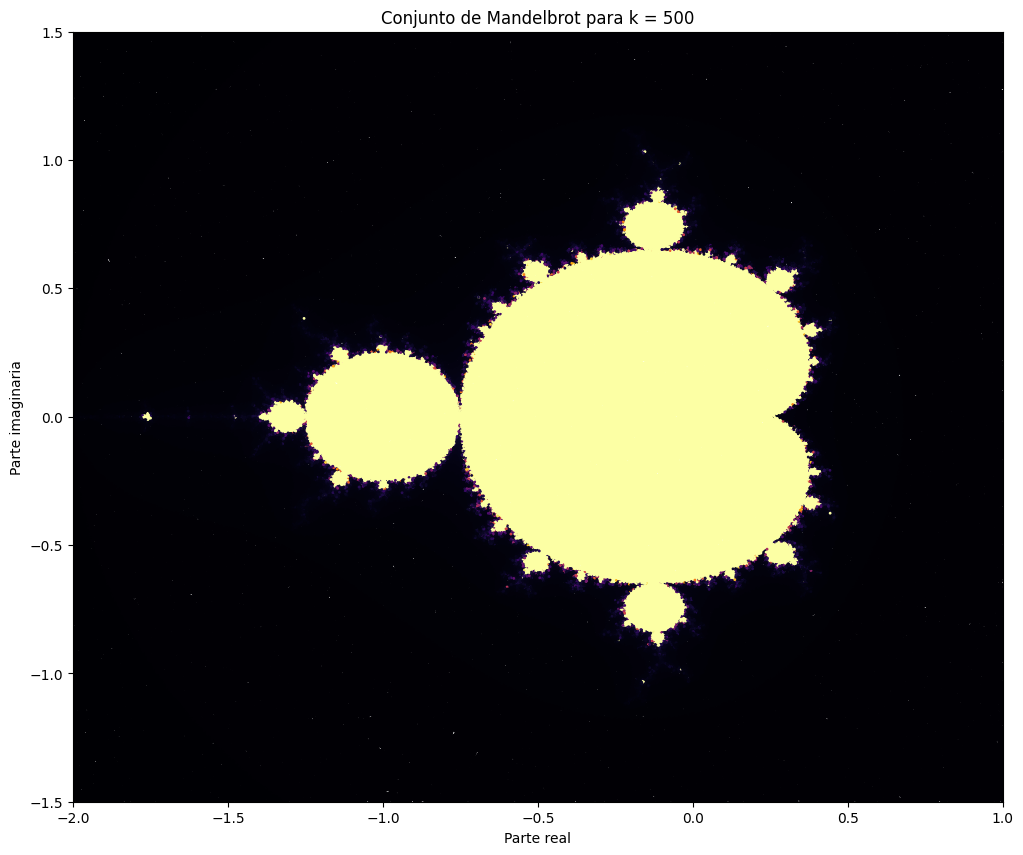

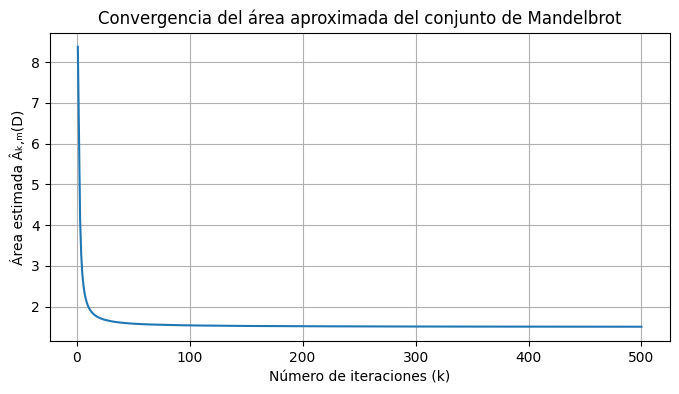

In [169]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Definimos el conjunto V perteneciente al conjunto de Mandelbrot
x_min, x_max = -2.0, 1.0
y_min, y_max = -1.5, 1.5

num_random_points = int(1e6)
max_iter = 500

# Generamos puntos complejos aleatorios
real = np.random.uniform(x_min, x_max, num_random_points)
imag = np.random.uniform(y_min, y_max, num_random_points)
c = real + 1j * imag

print(f'Cantidad de puntos complejos (c) generados: {len(c)}')

z = np.zeros_like(c)

# Inicializamos escape_times y is_convergent
escape_times = np.full(num_random_points, max_iter)
is_convergent = np.ones(num_random_points, dtype=bool)

# Iteramos para determinar la convergencia de los puntos
area_V = (x_max - x_min) * (y_max - y_min)
area_estimates = []

for k in range(1, max_iter + 1):
    z[is_convergent] = z[is_convergent]**2 + c[is_convergent]
    escaped_now = np.abs(z[is_convergent]) >= 2
    escape_indices = np.where(is_convergent)[0][escaped_now]
    escape_times[escape_indices] = k
    is_convergent[escape_indices] = False

    # Cálculo del área en esta iteración
    area_k = np.sum(is_convergent) * area_V / num_random_points
    area_estimates.append(area_k)

# Normalizar el número de iteraciones para el mapa de colores
norm = mcolors.Normalize(vmin=0, vmax=max_iter)

# Elegimos un mapa de colores de la librería matplotlib
cmap = plt.cm.inferno

# Mapeamos los tiempos de escape a colores
colors = cmap(norm(escape_times))

k_values = [1, 2, 5, 10, 100, max_iter] # Aquí, max_iter se interpreta como K

# Visualización del conjunto de Mandelbrot para diferentes k_values
def plot_mandelbrot_for_k(k_values, colors, escape_times, real, imag):  # Añadimos real e imag
    for k in k_values:
        plt.figure(figsize=(12, 10))
        # Crear máscara para puntos que escapan antes de k
        mask = escape_times <= k
        # Visualizar los puntos usando scatter plot
        plt.scatter(real[mask], imag[mask], c=colors[mask], s=1)  # Usamos la máscara para filtrar
        plt.xlabel('Parte real')
        plt.ylabel('Parte imaginaria')
        plt.title(f'Conjunto de Mandelbrot para k = {k}')
        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)
        plt.show()

plot_mandelbrot_for_k(k_values, colors, escape_times, real, imag)  # Pasamos real e imag

# Visualización de la convergencia del área según los diferentes valor de k solicitados.
plt.figure(figsize=(8, 4))
plt.plot(range(1, max_iter + 1), area_estimates)
plt.xlabel('Número de iteraciones (k)')
plt.ylabel('Área estimada Âₖ,ₘ(D)')
plt.title('Convergencia del área aproximada del conjunto de Mandelbrot')
plt.grid(True)
plt.show()

Otra forma de representar lo anterior, pero hasta K=100:

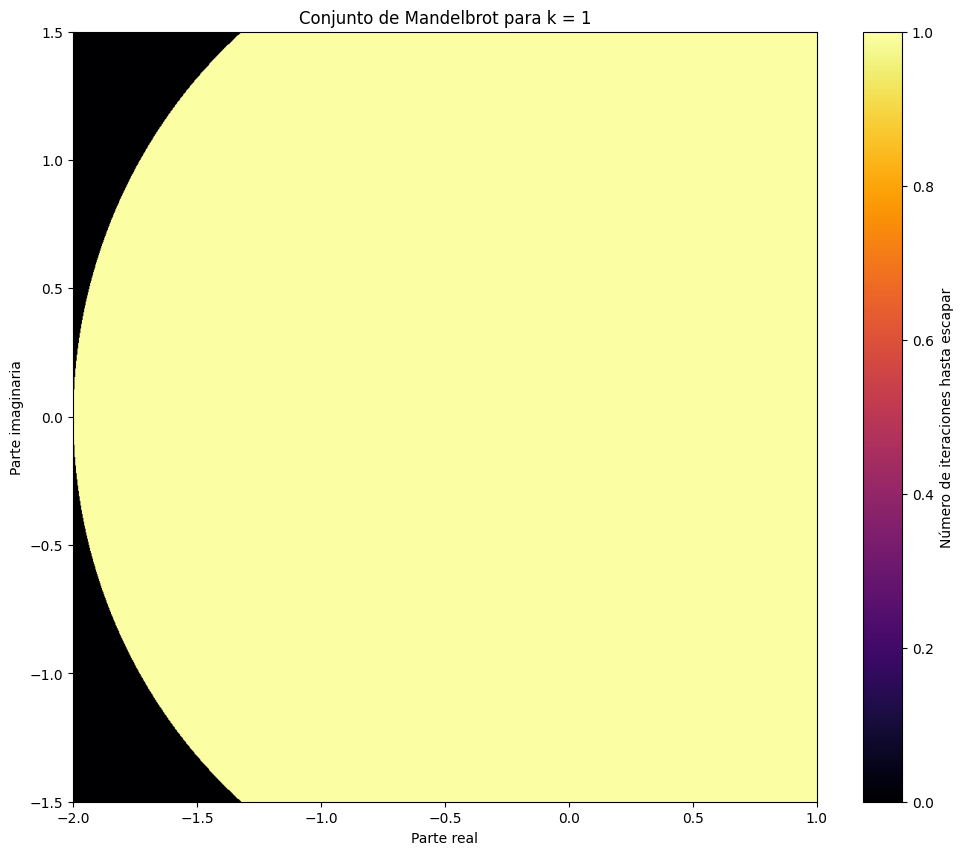

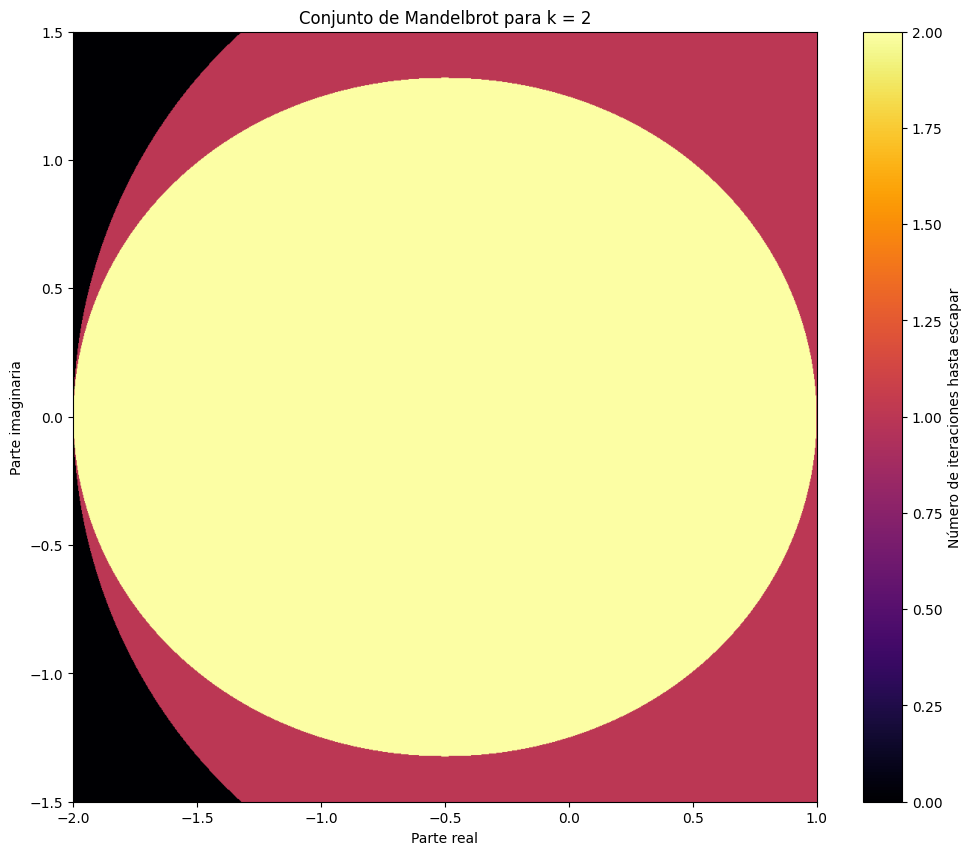

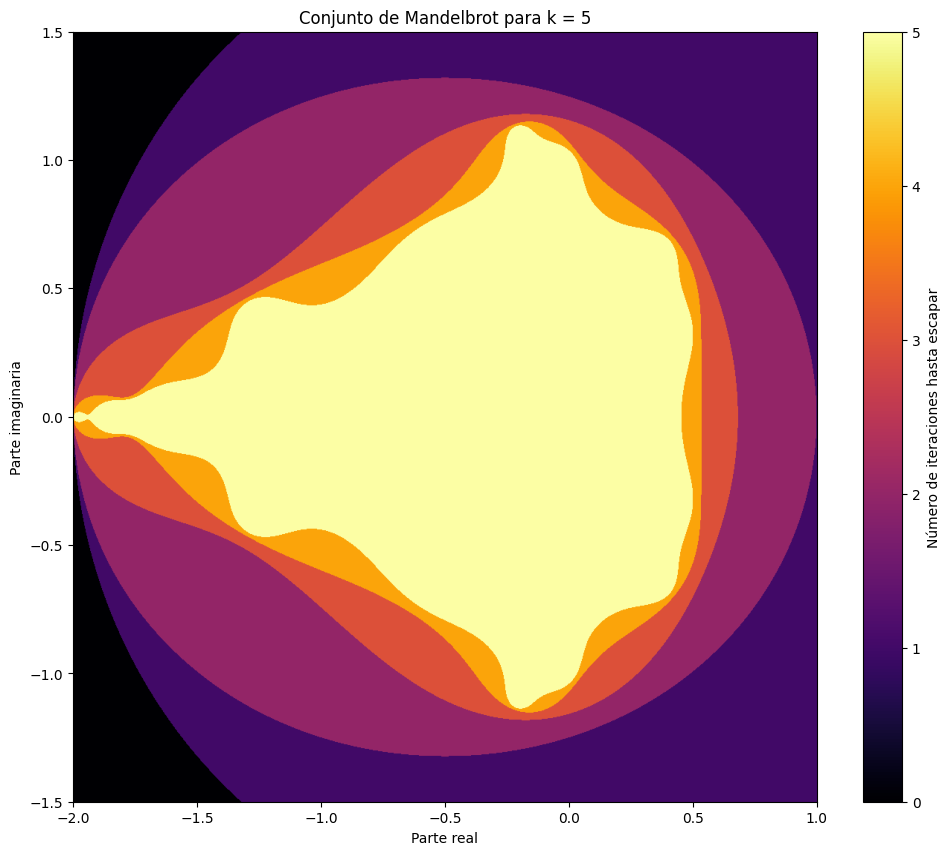

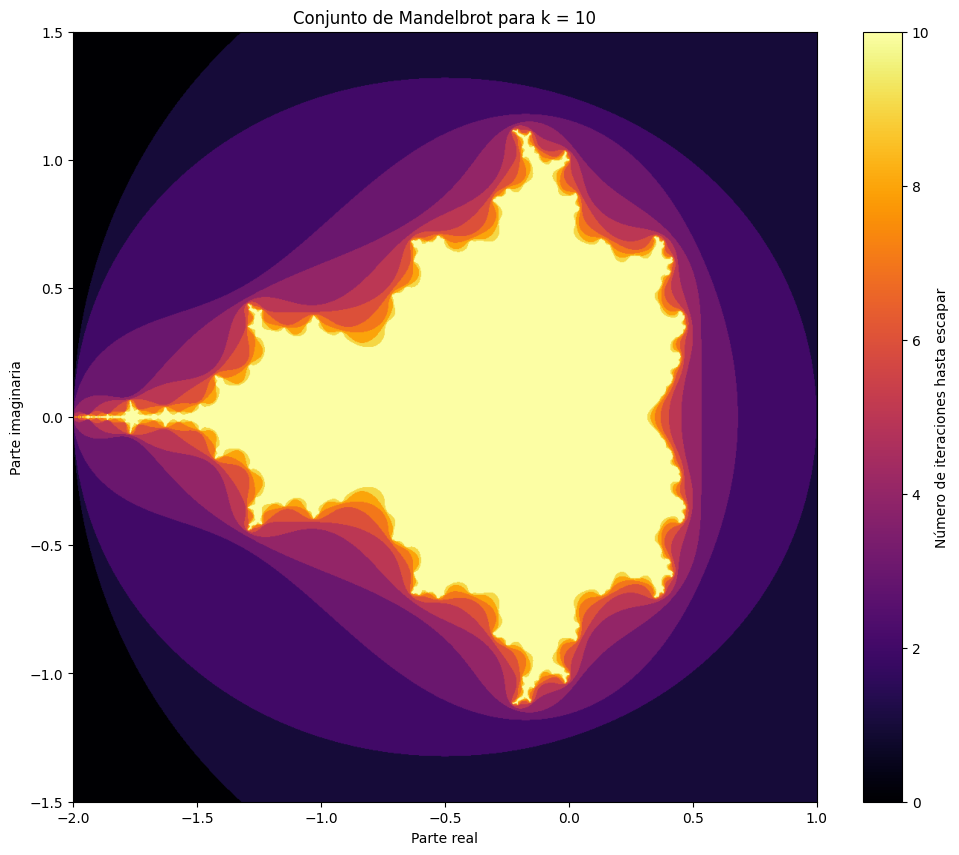

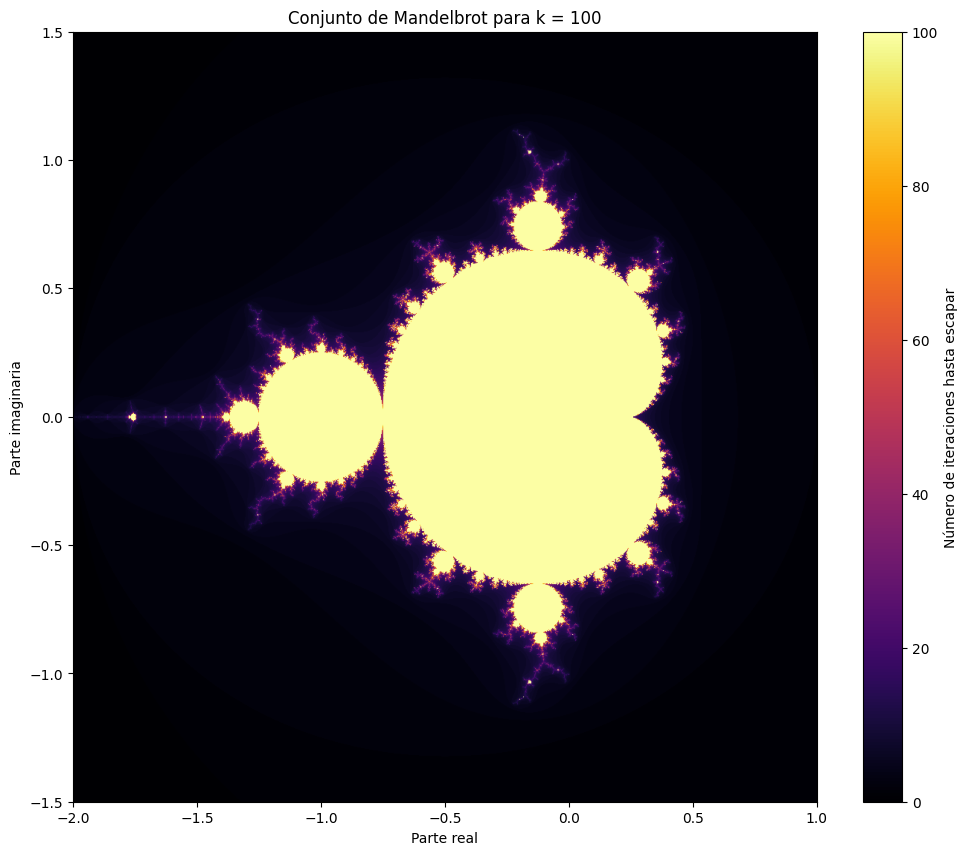

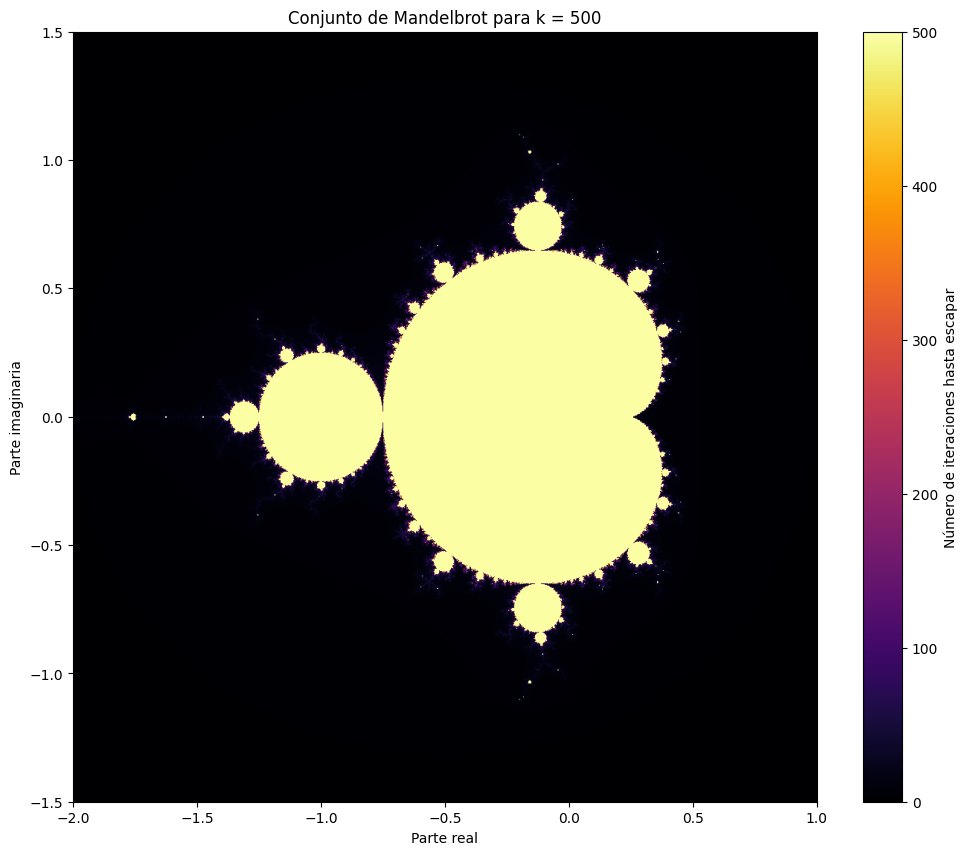

In [170]:
# Crear una malla de puntos en el plano complejo
x, y = np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000)
X, Y = np.meshgrid(x, y)
C = X + 1j * Y

# Inicializar las variables
escape_times = np.zeros(C.shape, dtype=int)

# Función para calcular el número de iteraciones de escape
def mandelbrot_iterations(c, max_iter):
    z = 0 # El primer valor siempre es 0 según la fórmula del algoritmo.
    for k in range(max_iter):
        z = z**2 + c
        if abs(z) > 2:
            return k
    return max_iter

# Iterar sobre cada punto y calcular las iteraciones de escape
for i in range(C.shape[0]):
    for j in range(C.shape[1]):
        escape_times[i, j] = mandelbrot_iterations(C[i, j], max_iter)

# Función para visualizar el conjunto de Mandelbrot para diferentes valores de k
def plot_mandelbrot_for_k(k_values):
    for k in k_values:
        plt.figure(figsize=(12, 10))
        # Usamos el número de iteraciones de escape de cada punto limitado por k
        plot_data = np.where(escape_times < k, escape_times, k)  # Limitar las iteraciones a k
        plt.imshow(plot_data, extent=(x_min, x_max, y_min, y_max), cmap='inferno', origin='lower', aspect='auto')
        plt.colorbar(label='Número de iteraciones hasta escapar')
        plt.xlabel('Parte real')
        plt.ylabel('Parte imaginaria')
        plt.title(f'Conjunto de Mandelbrot para k = {k}')
        plt.show()

# Lista de valores de k que queremos visualizar
k_values = [1, 2, 5, 10, 100, max_iter] # Aquí, se toma K como max_iter.

# Visualizar para cada valor de k
plot_mandelbrot_for_k(k_values)

Otra representación más:

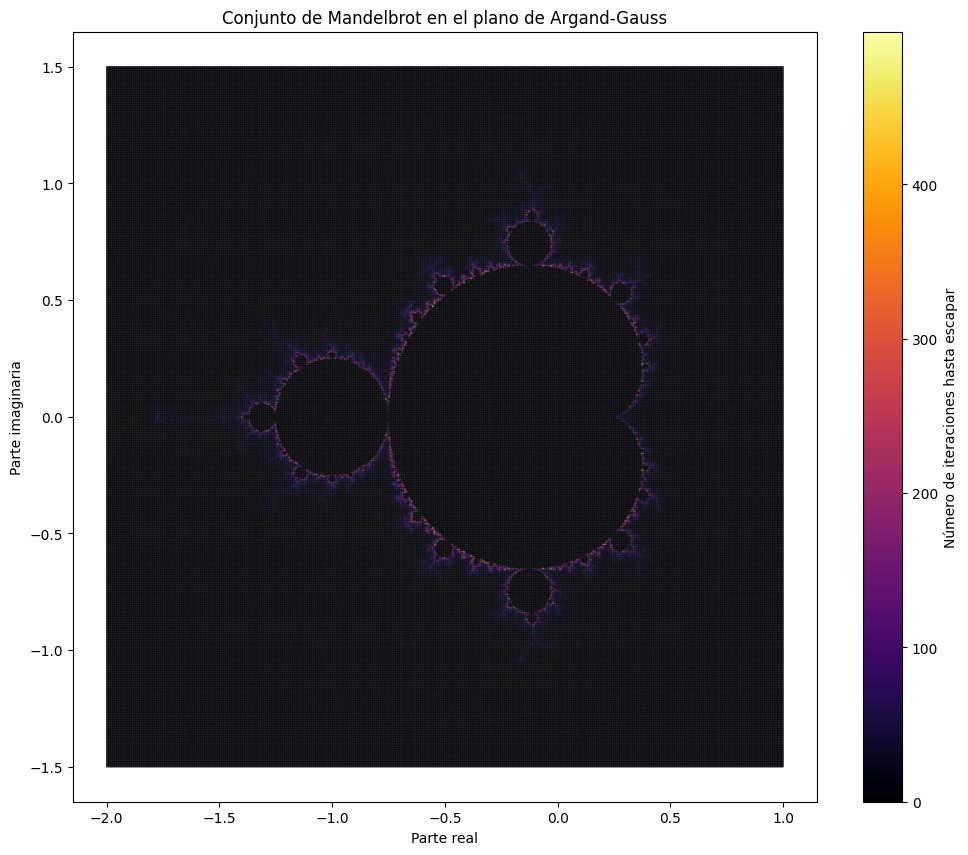

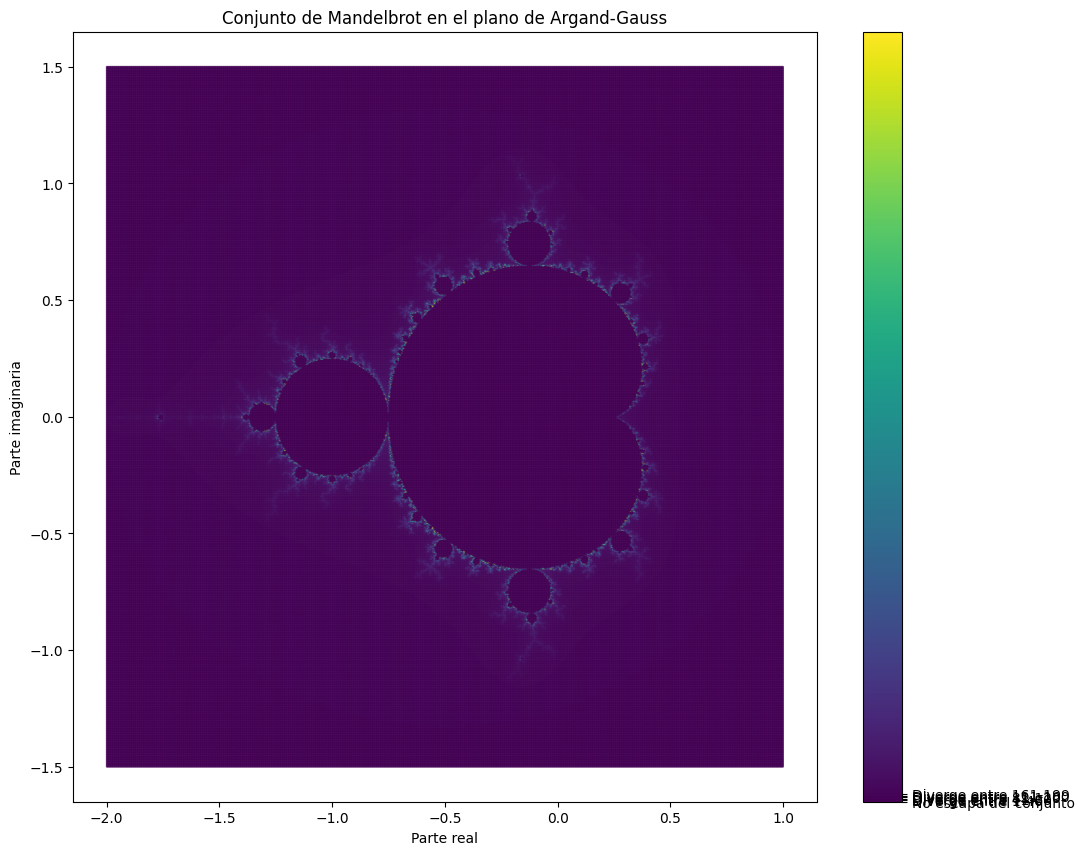

In [171]:
# Creamos una malla de puntos en el plano complejo
x, y = np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000)
X, Y = np.meshgrid(x, y)
C = X + 1j * Y

# Variables
escape_times = np.zeros(C.shape, dtype=int)
cmap = plt.cm.viridis

# Iteramos sobre cada punto
for i in range(C.shape[0]):
    for j in range(C.shape[1]):
        z = 0
        c = C[i, j]
        for k in range(max_iter):
            z = z**2 + c
            if abs(z) > 2:
                escape_times[i, j] = k
                break

# Filtramos los puntos que no escapan, que convergen (donde escape_times == max_iter)
inside_mandelbrot = escape_times == max_iter

# Visualización con scatter para mayor control de los puntos
plt.figure(figsize=(12,10))
scatter = plt.scatter(C.real, C.imag, c=escape_times, cmap='inferno', s=0.1, marker='.')
plt.xlabel('Parte real')
plt.ylabel('Parte imaginaria')
plt.title('Conjunto de Mandelbrot en el plano de Argand-Gauss')

# Barra de color
cbar = plt.colorbar(scatter)
cbar.set_label('Número de iteraciones hasta escapar')

plt.show()

# Vis de color según los puntos clasificados según divergencia en su iteración:
plt.figure(figsize=(12,10))
scatter = plt.scatter(C.real, C.imag, c=escape_times, cmap=cmap, s=0.2, marker='.')
plt.xlabel('Parte real')
plt.ylabel('Parte imaginaria')
plt.title('Conjunto de Mandelbrot en el plano de Argand-Gauss')

# Barra de divergencia orientativa.
cbar = plt.colorbar(scatter, ticks=[0,1,2,3,4,5])
cbar.ax.set_yticklabels(['No escapa del conjunto', 'Diverge entre 1-40', 'Diverge entre 41-80',
                         'Diverge entre 81-120', 'Diverge entre 121-160', 'Diverge entre 161-199'])

plt.show()

Se ha utilizado ChatGPT para las gráficas con matplotlib y el código de la iteración paralela, aplicando la fórmula de Mendelbrot.

Todos los comentarios del código y su explicación en las celdas MarkDown fueron realizados por mí, también he cambiado casi por completo todo el código de las celdas, a excepción de la iteración, que funciona muy bien como está.